In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/trainings/Online Retail.xlsx
/kaggle/input/trainings/adult.csv
/kaggle/input/trainings/narendramodi_tweets.csv
/kaggle/input/trainings/employees_attrition.csv
/kaggle/input/trainings/naukri_jobs_datascience.csv
/kaggle/input/trainings/restaurant_reviews.csv
/kaggle/input/trainings/insurance.csv
/kaggle/input/trainings/odi-batting.csv
/kaggle/input/trainings/amazon_reviews_big.csv
/kaggle/input/trainings/bank-full.csv
/kaggle/input/trainings/sales_store_data.csv
/kaggle/input/trainings/IMDB Dataset.csv
/kaggle/input/trainings/sales_data.csv
/kaggle/input/trainings/Advertising.csv
/kaggle/input/trainings/Reviews/Reviews.csv


In [2]:
tweets = pd.read_csv('/kaggle/input/trainings/narendramodi_tweets.csv')
tweets.head(3)

,id,retweets_count,favorite_count,created_at,text,lang,retweeted,followers_count,friends_count,hashtags_count,description,location,background_image_url,source
0,8.263846e+17,1406.0,4903.0,2017-01-31 11:00:07,The President's address wonderfully encapsulat...,en,False,26809964.0,1641.0,1.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client
1,8.263843e+17,907.0,2877.0,2017-01-31 10:59:12,Rashtrapati Ji's address to both Houses of Par...,en,False,26809964.0,1641.0,0.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client
2,8.263827e+17,694.0,0.0,2017-01-31 10:52:33,RT @PMOIndia: Empowering the marginalised. htt...,en,False,26809964.0,1641.0,0.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client


In [3]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3220 entries, 0 to 3219
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    3220 non-null   float64
 1   retweets_count        3220 non-null   float64
 2   favorite_count        3220 non-null   float64
 3   created_at            3220 non-null   object 
 4   text                  3220 non-null   object 
 5   lang                  3220 non-null   object 
 6   retweeted             3220 non-null   bool   
 7   followers_count       3220 non-null   float64
 8   friends_count         3220 non-null   float64
 9   hashtags_count        3220 non-null   float64
 10  description           3220 non-null   object 
 11  location              3220 non-null   object 
 12  background_image_url  3220 non-null   object 
 13  source                3220 non-null   object 
dtypes: bool(1), float64(6), object(7)
memory usage: 330.3+ KB


In [4]:
tweets.shape

(3220, 14)

In [5]:
tweets['created_at'] = pd.to_datetime(tweets['created_at'], format='%Y-%m-%d %H:%M:%S')

In [6]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3220 entries, 0 to 3219
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    3220 non-null   float64       
 1   retweets_count        3220 non-null   float64       
 2   favorite_count        3220 non-null   float64       
 3   created_at            3220 non-null   datetime64[ns]
 4   text                  3220 non-null   object        
 5   lang                  3220 non-null   object        
 6   retweeted             3220 non-null   bool          
 7   followers_count       3220 non-null   float64       
 8   friends_count         3220 non-null   float64       
 9   hashtags_count        3220 non-null   float64       
 10  description           3220 non-null   object        
 11  location              3220 non-null   object        
 12  background_image_url  3220 non-null   object        
 13  source            

In [7]:
tweets['created_at'].describe()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


count                    3220
unique                   3220
top       2017-01-31 11:00:07
freq                        1
first     2016-03-09 12:22:10
last      2017-01-31 11:00:07
Name: created_at, dtype: object

In [8]:
tweets.shape

(3220, 14)

In [9]:
tweets.head(2)

,id,retweets_count,favorite_count,created_at,text,lang,retweeted,followers_count,friends_count,hashtags_count,description,location,background_image_url,source
0,8.263846e+17,1406.0,4903.0,2017-01-31 11:00:07,The President's address wonderfully encapsulat...,en,False,26809964.0,1641.0,1.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client
1,8.263843e+17,907.0,2877.0,2017-01-31 10:59:12,Rashtrapati Ji's address to both Houses of Par...,en,False,26809964.0,1641.0,0.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client


In [10]:
# Simple code-snippet to understand split method
ts = ' Hello, this is a statement. And we test it '
ts1 = ts.split()
ts2 = ts.split(' ')
print(ts1), print(ts2)

['Hello,', 'this', 'is', 'a', 'statement.', 'And', 'we', 'test', 'it']
['', 'Hello,', 'this', 'is', 'a', 'statement.', 'And', 'we', 'test', 'it', '']


(None, None)

In [11]:
docs = tweets['text'].str.lower()
docs = docs.str.replace('[^a-z\s#@]', '')
docs_words = docs.str.split(' ')
docs_words

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


0       [the, presidents, address, wonderfully, encaps...
1       [rashtrapati, jis, address, to, both, houses, ...
2       [rt, @pmoindia, empowering, the, marginalised,...
3       [rt, @pmoindia, commitment, to, welfare, of, f...
4       [rt, @pmoindia, improving, the, quality, of, l...
                              ...                        
3215    [passage, of, real, estate, bill, is, great, n...
3216    [rt, @dpradhanbjp, highlights, of, pradhan, ma...
3217    [successful, launch, of, irnssf, is, an, accom...
3218    [on, cisfs, raising, day, i, salute, all, cisf...
3219    [, , , , , , , , , , , , , , , , , , , \r\nhtt...
Name: text, Length: 3220, dtype: object

## Bag of Word Analysis

In [12]:
all_words = []
for doc in docs_words:
    all_words.extend(doc)
words_freq = pd.Series(all_words).value_counts()
words_freq.head(10)

       4760
the    2185
to     1517
of     1509
amp    1480
in     1038
a       875
for     654
on      649
rt      573
dtype: int64

## Stopword Removal

In [13]:
import nltk

In [14]:
import seaborn as sn
import matplotlib.pyplot as plt

In [15]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [16]:
common_stopwords = nltk.corpus.stopwords.words('english')
custom_stopwords = ['br', 'amp', 'rt', '']
all_stopwords = common_stopwords + custom_stopwords

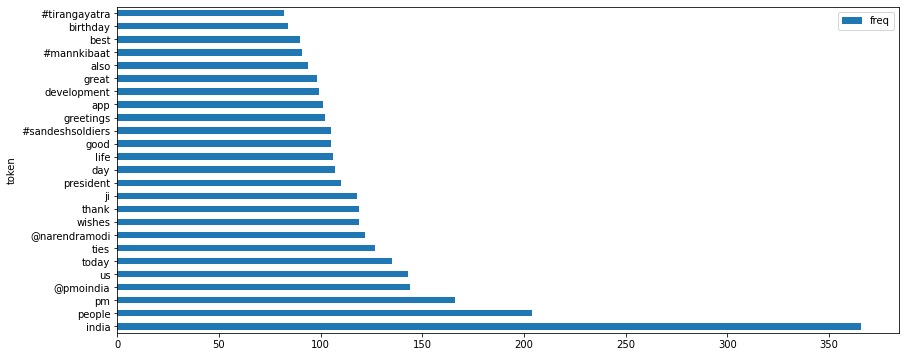

In [17]:
df_words_freq = words_freq.reset_index().rename(columns={'index':'token', 0:'freq'})
df_words_freq = df_words_freq[~df_words_freq['token'].isin(all_stopwords)].reset_index(drop=True)
df_words_freq.head(25).plot.barh(x='token', y='freq', figsize=(14,6))
plt.show()

## WordCloud

In [18]:
from wordcloud import WordCloud
# In order to generate wordcloud all the documents/words in all documents should be made into single string

In [19]:
all_words_wc = ' '.join(all_words)
all_words_wc[:90]

'the presidents address wonderfully encapsulated indias strengths aspirations potential amp'

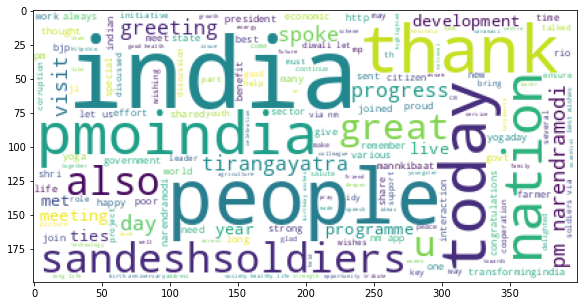

In [20]:
wc = WordCloud(background_color='white', stopwords=all_stopwords).generate(all_words_wc)
plt.figure(figsize=(14,5))
plt.imshow(wc);

## Hashtag Analysis

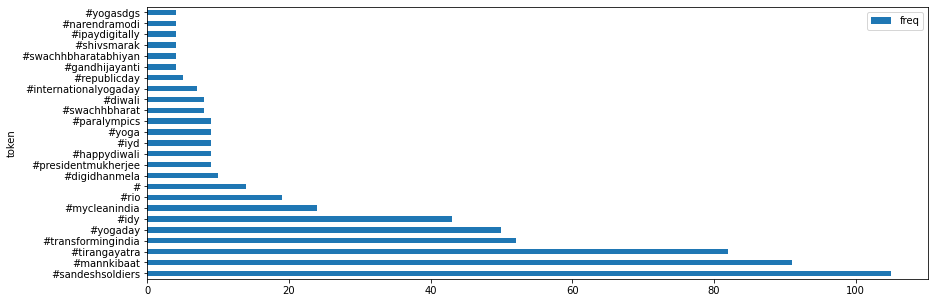

In [21]:
hashtags = df_words_freq[df_words_freq['token'].str.startswith('#')]
hashtags.head(25).sort_values(by='freq',ascending=False).plot.barh(x='token', y='freq', figsize=(14,5))
plt.show()

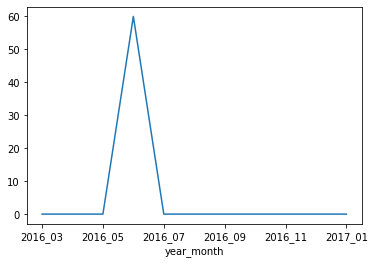

In [22]:
hashtag = "#yogaday"
tweets['docs'] = docs
tweets['hashtag'] = tweets['docs'].str.contains(hashtag)
tweets['hashtag'] = tweets['hashtag'].apply(lambda v: 1 if v==True else 0)
tweets['year_month'] = tweets['created_at'].dt.strftime('%Y_%m')
tweets.groupby('year_month')['hashtag'].sum().plot.line();

# Document Term Matrix (DTM)
* It is one way of converting text documents into document vectors or word vectors.
* It's a technique that falls under vectorization.

From a text document tokens/terms are extracted and formed into columns.<br>
Each text document will become a row and the data will be the frequency of each term/token in that document.<br>
So<br>
A column wise sum --> Token wise freq in all documents (A vector representation of token)<br>
A Row wise sum    --> No. of tokens in a document

### <b><u>Cons:</b></u>
<ol>
    <li>It is a high dimentional matrix.</li>
    <li>It is a sparse matrix, almost 98% values will be zeros.</li>
</ol>

In [23]:
reviews = pd.read_csv('/kaggle/input/trainings/amazon_reviews_big.csv').sample(10000)
reviews.head(3)

,asin,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
62026,B003B3P2CO,4,When I first got this it was a little slow to ...,"06 3, 2013",AQGG20Z0KE0WV,Mark Wilson,Works good,1.370218e+09
78376,B0042XORMI,3,"Good deal, but be prepared to get your magnify...","07 22, 2013",A3APBEIXAEHPP7,Tom,"Amp rated on each hard to read, Bins are not l...",1.374451e+09
29639,B001F7AHOG,5,This iPod worked exactly as described. I like...,"05 5, 2014",AEZIYSTR1GZLF,ProductSleuth,An iPod,1.399248e+09


In [24]:
reviews['sentiment'] = reviews['overall'].apply(lambda v: 'positive' if v>=3 else 'negative')
reviews.head(3)

,asin,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,sentiment
62026,B003B3P2CO,4,When I first got this it was a little slow to ...,"06 3, 2013",AQGG20Z0KE0WV,Mark Wilson,Works good,1.370218e+09,positive
78376,B0042XORMI,3,"Good deal, but be prepared to get your magnify...","07 22, 2013",A3APBEIXAEHPP7,Tom,"Amp rated on each hard to read, Bins are not l...",1.374451e+09,positive
29639,B001F7AHOG,5,This iPod worked exactly as described. I like...,"05 5, 2014",AEZIYSTR1GZLF,ProductSleuth,An iPod,1.399248e+09,positive


In [25]:
reviews.shape

(10000, 9)

## Stemming

In [26]:
from gensim.parsing.preprocessing import remove_stopwords
from gensim.parsing.porter import PorterStemmer

In [27]:
def checkNullValues():
    nan_COLUMN_indexes=list(reviews.loc[pd.isna(reviews['reviewText']), :].index.values)
    print(nan_COLUMN_indexes)
    
checkNullValues()

[42932, 25988, 94796, 33898, 58061, 62495, 5833, 23048]


In [28]:
reviews['reviewText'] = reviews['reviewText'].fillna('')
checkNullValues()

[]


In [29]:
stemmer = PorterStemmer()
docs = reviews['reviewText'].str.lower().str.replace('[^a-z\s]','')
docs = docs.apply(remove_stopwords)
docs = stemmer.stem_documents(docs)
docs = pd.Series(docs)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [30]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [31]:
trainx, testx, trainy, testy = train_test_split(docs, reviews['sentiment'], test_size=0.2, random_state=3)
vectorizer = CountVectorizer().fit(trainx)

In [32]:
vocab = vectorizer.get_feature_names()
vocab_size = len(vocab)
print('We have %d words across %d documents' % (vocab_size, trainx.shape[0]))

We have 26000 words across 8000 documents


In [33]:
train_dtm = vectorizer.transform(trainx)
test_dtm = vectorizer.transform(testx)
train_dtm

<8000x26000 sparse matrix of type '<class 'numpy.int64'>'
	with 311091 stored elements in Compressed Sparse Row format>

In [34]:
uncompressed_matrix = train_dtm.toarray()
df_train_dtm = pd.DataFrame(uncompressed_matrix, columns=vocab, index=trainx.index)
df_test_dtm = pd.DataFrame(test_dtm.toarray(), columns=vocab, index=testx.index)

In [35]:
df_train_dtm

,aa,aaa,aaaa,aaaaaenellen,aaabatteri,aaacharg,aac,aacmp,aacvideo,aaex,...,zunehd,zunelik,zv,zvizio,zvok,zvu,zx,zxi,zyxel,zz
5291,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8771,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
35,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1255,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3266,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6400,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9160,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9859,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1688,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Column wise sum

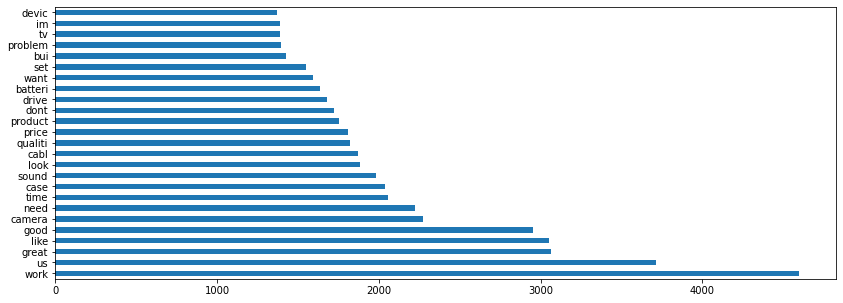

In [36]:
top_words = df_train_dtm.sum().sort_values(ascending=False).head(25)
top_words.plot.barh(figsize=(14,5))
plt.show()

### Row wise sum

In [37]:
df_train_dtm.sum(axis=1).sort_values(ascending=False).describe()

count    8000.000000
mean       50.715625
std        72.787554
min         0.000000
25%        15.000000
50%        27.000000
75%        57.000000
max      1616.000000
dtype: float64

## Word Similarity

* We will use cosine similarity to check if two words are similar or not
* Cosine similarity is the best suitable measure for checking sparse vectors as it excludes 0's.
* Cosine Similarity value ranges from 0 - 1 where closer to 0 indicates there is no/very less similarity and vice versa.

In [38]:
from sklearn.metrics.pairwise import cosine_similarity

In [39]:
v1 = df_train_dtm['camera']
v2 = df_train_dtm['product']
cosine_similarity([v1,v2])[0][1]

0.09656663554490647

In [40]:
v1 = df_train_dtm['camera']
v2 = df_train_dtm['batteri']
cosine_similarity([v1,v2])[0][1]

0.26175391624436

In [41]:
v1.shape

(8000,)

## Document Similarity

In [42]:
d1 = df_train_dtm.iloc[1]
d2 = df_train_dtm.iloc[100]
cosine_similarity([d1,d2])[0][1]

0.08006407690254358

As DTM is a high dimensional matrix, the diemnsionality can be reduced by using
1. min_df
2. N-Grams

In [43]:
# min_df argument is to tell that the token should have appeared in atleast given value of documents (here it is 5)
vectorizer = CountVectorizer(min_df=5).fit(trainx)
train_dtm = vectorizer.transform(trainx)
train_dtm

<8000x4430 sparse matrix of type '<class 'numpy.int64'>'
	with 283266 stored elements in Compressed Sparse Row format>

## N-Grams

### Top 5 Bi-grams

In [44]:
vectorizer = CountVectorizer(min_df=5, ngram_range=(2,2)).fit(trainx)
train_dtm = vectorizer.transform(trainx)
train_dtm

<8000x7233 sparse matrix of type '<class 'numpy.int64'>'
	with 73095 stored elements in Compressed Sparse Row format>

In [45]:
vocab = vectorizer.get_feature_names()
df_train_dtm = pd.DataFrame(train_dtm.toarray(), columns=vocab, index=trainx.index)
df_train_dtm.sum().sort_values(ascending=False).head(5)

work great          577
work fine           324
hard drive          301
highli recommend    279
sound qualiti       278
dtype: int64

### Top 5 Tri-grams

In [46]:
vectorizer = CountVectorizer(min_df=5, ngram_range=(3,3)).fit(trainx)
train_dtm = vectorizer.transform(trainx)
train_dtm

<8000x287 sparse matrix of type '<class 'numpy.int64'>'
	with 2061 stored elements in Compressed Sparse Row format>

In [47]:
vocab = vectorizer.get_feature_names()
df_train_dtm = pd.DataFrame(train_dtm.toarray(), columns=vocab, index=trainx.index)
df_train_dtm.sum().sort_values(ascending=False).head(5)

work like charm       50
extern hard drive     39
sound qualiti good    31
point shoot camera    26
wide angl len         23
dtype: int64

In [48]:
vectorizer = CountVectorizer(min_df=5, ngram_range=(1,3)).fit(trainx)
train_dtm = vectorizer.transform(trainx)
train_dtm

<8000x11950 sparse matrix of type '<class 'numpy.int64'>'
	with 358422 stored elements in Compressed Sparse Row format>

In [49]:
vocab = vectorizer.get_feature_names()
df_train_dtm = pd.DataFrame(train_dtm.toarray(), columns=vocab, index=trainx.index)
df_train_dtm.sum().sort_values(ascending=False).head(50)
vocab[:30]

['aa',
 'aa aaa',
 'aa batteri',
 'aaa',
 'aaa batteri',
 'aac',
 'abandon',
 'abc',
 'aberr',
 'abil',
 'abil plai',
 'abil us',
 'abl',
 'abl access',
 'abl add',
 'abl charg',
 'abl connect',
 'abl download',
 'abl easili',
 'abl hear',
 'abl pictur',
 'abl plai',
 'abl plug',
 'abl receiv',
 'abl run',
 'abl set',
 'abl switch',
 'abl transfer',
 'abl us',
 'abl watch']

# Document Clustering
Clustering Algorithms KMeans, DBSCan

In [50]:
vectorizer = CountVectorizer(min_df=5, ngram_range=(1,1)).fit(trainx)
train_dtm = vectorizer.transform(trainx)
vocab = vectorizer.get_feature_names()
df_train_dtm = pd.DataFrame(train_dtm.toarray(), columns=vocab, index=trainx.index)
df_train_dtm.head()

,aa,aaa,aac,abandon,abc,aberr,abil,abl,absolut,absorb,...,zagg,zeiss,zen,zero,zip,zipper,zone,zoom,zs,zune
5291,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8771,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
35,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1255,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3266,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [52]:
sc_dtm = StandardScaler().fit_transform(df_train_dtm)
model = KMeans(n_clusters=5).fit(sc_dtm)

In [53]:
df = pd.DataFrame({'review':trainx, 'cluster':model.labels_})
df.head(2)

,review,cluster
5291,love product star didnt drop connect know wire...,1
8771,pack cabl great deal compar multipl market ite...,1


### Let's see what all words are in cluster 2

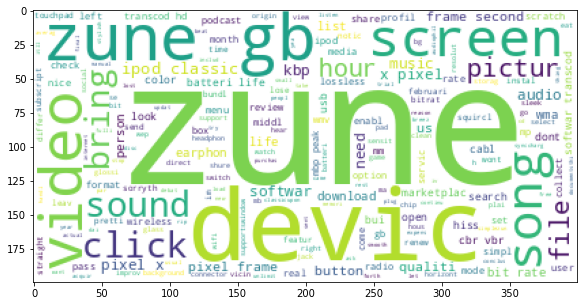

In [54]:
cluster_data = df[df['cluster'] == 2]
docs_string = ' '.join(cluster_data['review'])
wc = WordCloud(background_color='white').generate(docs_string)
plt.figure(figsize=(14,5))
plt.imshow(wc)

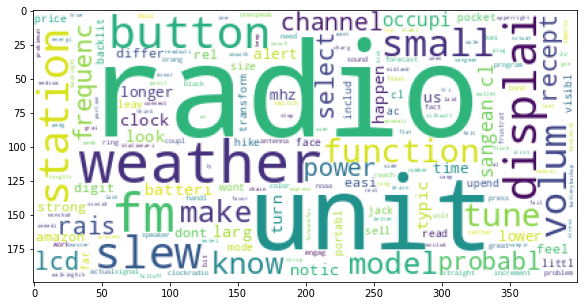

In [55]:
cluster_data = df[df['cluster'] == 3]
docs_string = ' '.join(cluster_data['review'])
wc = WordCloud(background_color='white').generate(docs_string)
plt.figure(figsize=(14,5))
plt.imshow(wc)